# Introduction:

This case study is based on an IBM Sample Data Set and can be used to test modelling approaches for modelling customer churn and to support insight into the factors that management might consider in their customer retention programmes 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:


Explanation of variables:

customerID:	Customer ID

Gender	Whether the customer is a male or a female  (1, 0)

SeniorCitizen	Whether the customer is a senior citizen or not (1, 0)

Partner	Whether the customer has a partner or not (Yes, No)  (1, 0)

Dependents	Whether the customer has dependents or not (Yes, No) (1, 0)

Tenure	Number of months the customer has stayed with the company.

PhoneService	Whether the customer has a phone service or not (Yes, No) (1, 0)

MultipleLines	Whether the customer has multiple lines or not (Yes, No, No phone service) (1, 0, 2)

InternetService	Customer’s internet service provider (DSL, Fiber optic, No)(1,2,0)

OnlineSecurity	Whether the customer has online security or not (Yes, No, No internet service)(1, 0, 2)

OnlineBackup	Whether the customer has online backup or not (Yes, No, No internet service)(1, 0, 2)

DeviceProtection	Whether the customer has device protection or not (Yes, No, No internet service)(1, 0, 2)

TechSupport	Whether the customer has tech support or not (Yes, No, No internet service)(1, 0, 2)

StreamingTV	Whether the customer has streaming TV or not (Yes, No, No internet service)(1, 0, 2)

StreamingMovies	Whether the customer has streaming movies or not (Yes, No, No internet service)(1, 0, 2)

Contract	The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling	Whether the customer has paperless billing or not (Yes, No)(1, 0)

PaymentMethod	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) (3,1,0,2)

MonthlyCharges	The amount charged to the customer monthly

TotalCharges	The total amount charged to the customer

Churn	Whether the customer churned or not (Yes or No)(1, 0)


# An example of a possible Data Science Assessment:

Using the dataset to assess the important features that management should consider in developing customer retention programme.  Prepare a short presentation (5 slides) discussing the dataset (including visuals displays of key relationships), your reasoning behind the decisions you made and your model performance if appropriate.

### Changes in Excel 

My first step was to explore the provided csv.

In order to sum up this markdown, I change directly in Excel the binary/ordinal values in Excel. This new Excel file is called: "Definitiva_1.xlsx".

I filtered the values by "Tenure" in the company- doing this way it was easier to simulate the cox regressions.

I found out that in "TotalCharges" there were empty values.
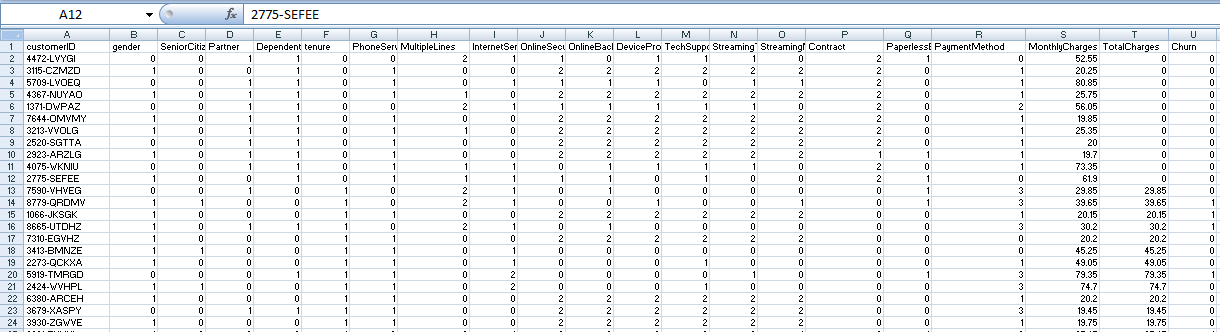


# Simulation on Python

In [1]:
# Basic preprocessing packages
import numpy as np
import pandas as pd

# Visualization packages

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Exploratory analysis

import statsmodels.api as sm
from scipy.stats import norm ## to draw the norm curv
from scipy import stats ;from scipy.stats import chi2_contingency# to make a chi square test
import scipy as sp
sns.set()


In [2]:
# df=pd.read_csv( "Definitiva_1.csv")
df = pd.read_excel (r'Definitiva_1.xlsx', sheet_name='AIA_Churn_Modelling_Case_Study')
df=df.iloc[:,1:]

# Exploratory Analysis

## Preprocessing

#### Checking Data variable types

In [3]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

#### Are there missing values?

In [4]:
df.isnull().any().sum()

0

### Quantitative variables

#### Are there outliers?

In [5]:
import statistics

The Monthly Charges median is 29 and its mean is 32.37
 Assimetry positive


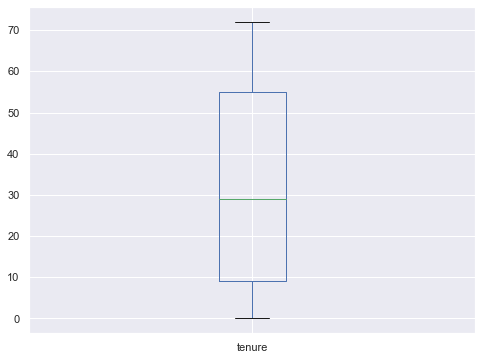

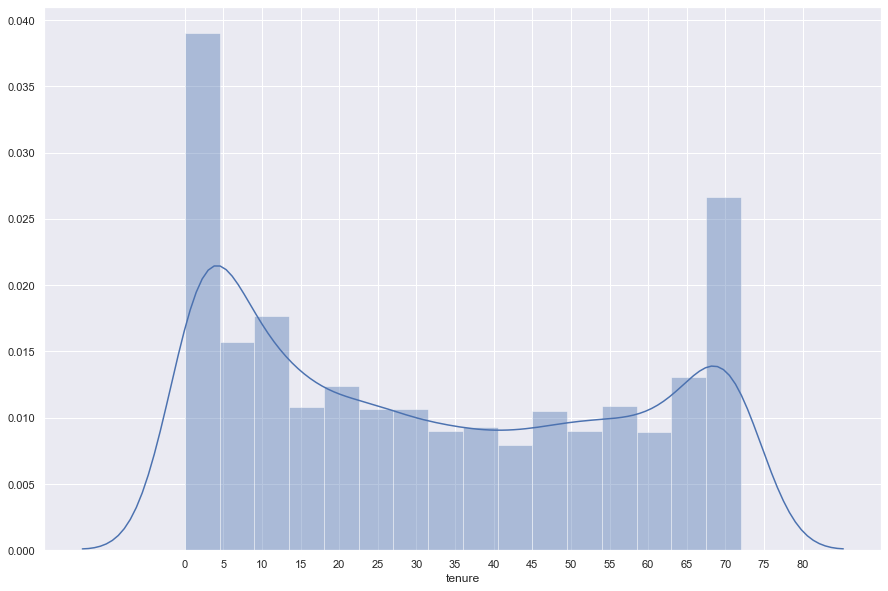

In [6]:
#Displaying box plot

df[['tenure']].plot.box(figsize=(8,6))

# calculation mean and median
median = statistics.median(df["tenure"])
mean=statistics.mean(df["tenure"])
print(f"The Monthly Charges median is {median} and its mean is {np.round(mean,2)}\n Assimetry positive")

# Displaying histogram
plt.figure(figsize=(15,10))
sns.distplot(df['tenure']);
plt.xticks(range(0,85,5));# I customize the x axis values

The Monthly Charges median is 70.35 and its mean is 64.76
 Assimetry negative


<Figure size 1080x720 with 0 Axes>

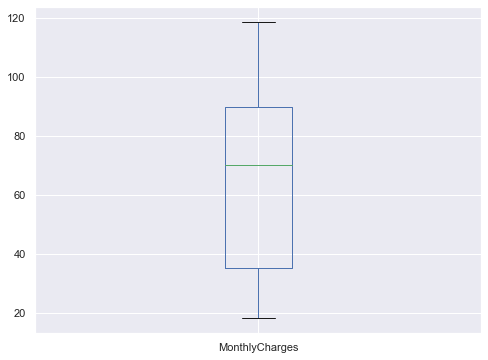

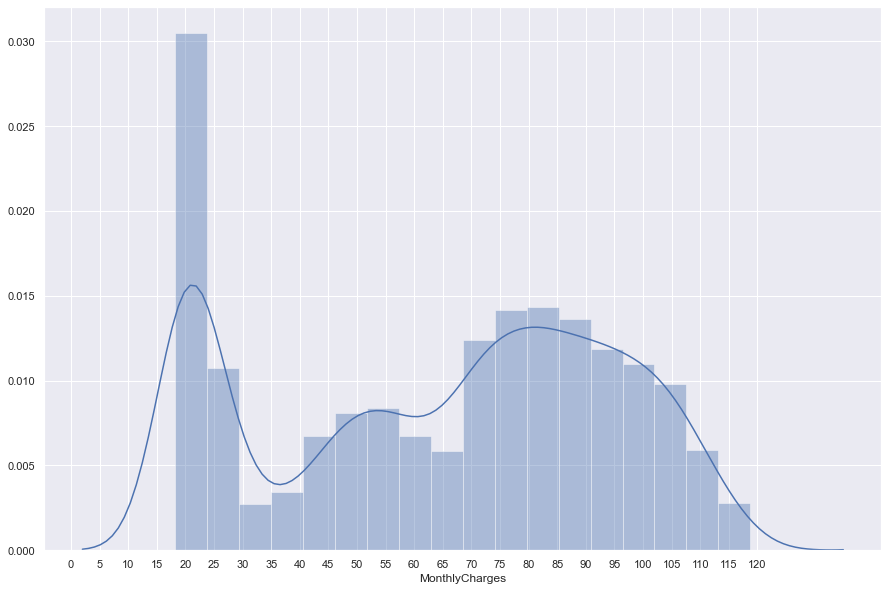

In [7]:
## Displaying box plot
plt.figure(figsize=(15,10))
df[['MonthlyCharges']].plot.box(figsize=(8,6))

# calculating mean and median

median = statistics.median(df["MonthlyCharges"])
mean=statistics.mean(df["MonthlyCharges"])
print(f"The Monthly Charges median is {median} and its mean is {np.round(mean,2)}\n Assimetry negative")

## Displaying histogram

plt.figure(figsize=(15,10))

sns.distplot(df['MonthlyCharges']);
plt.xticks(range(0,125,5));# I customize x axis values

The Total Charges median is 1394.55 and its mean is 2279.73
 Assimetry positive


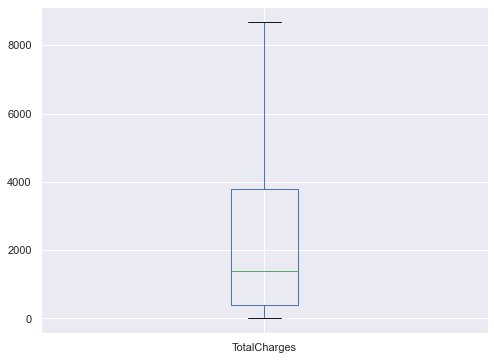

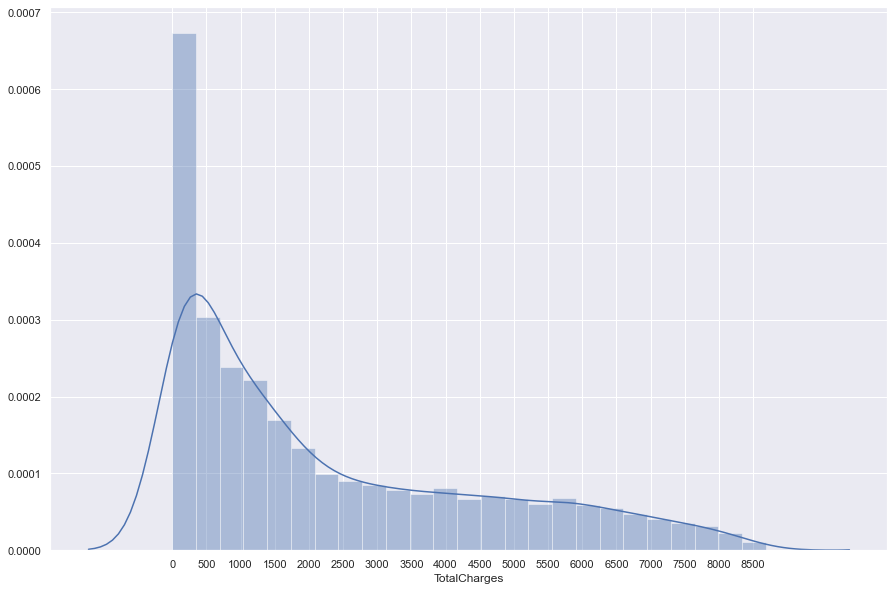

In [8]:
df[['TotalCharges']].plot.box(figsize=(8,6));
plt.figure(figsize=(15,10))

median = statistics.median(df["TotalCharges"])
mean=statistics.mean(df["TotalCharges"])

print(f"The Total Charges median is {median} and its mean is {np.round(mean,2)}\n Assimetry positive")

sns.distplot(df['TotalCharges']);
plt.xticks(range(0,9000,500)); # I customize x axis values

### Tenure relationship with charges variables

#### Monthly Charges by tenure

The monthly Charges values are not well distribuited. Theorically, it wouldn't be a good idea to create a simple regression model

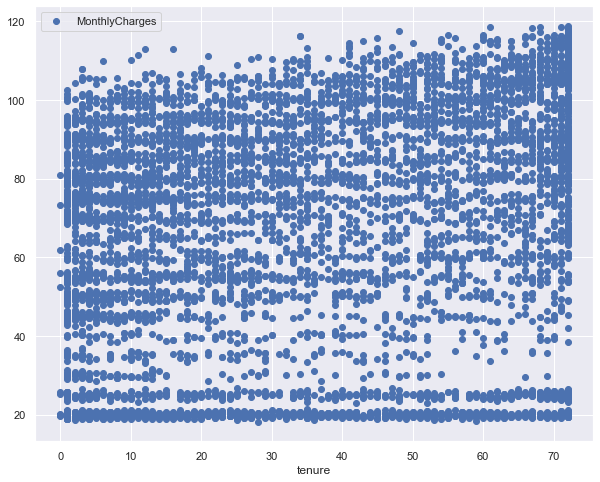

In [9]:
# df[["tenure", "TotalCharges"]].plot.line(figsize=(14,12))
df.plot(x='tenure', y='MonthlyCharges', style='o', figsize=(10,8));
# plt.title('Total Single Damage Number vs Total Schäden') 

### Total Charges and tenure

The total Charges variable seems to have a linear silhouette. However, the values seems not to be well distribuited for implementing a simple regression model


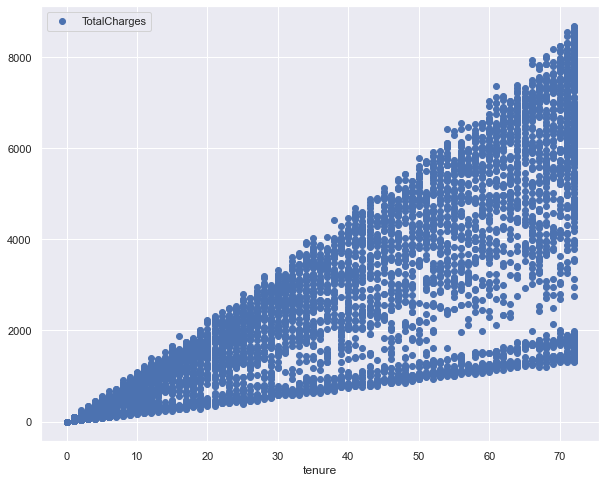

In [10]:
# df[["tenure", "TotalCharges"]].plot.line(figsize=(14,12))
df.plot(x='tenure', y='TotalCharges', style='o', figsize=(10,8));
# plt.title('Total Single Damage Number vs Total Schäden')  

#### The Kolmogorov-Smirnov normality test

Even I said that it doesn't seem to have well distribuited values, I want to test if the two samples are similar with Kolmogorov-Smirnov non parametric test.
[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

In [11]:
from scipy import stats

y = df["TotalCharges"]
x= df["tenure"]
KS_testX = stats.kstest(x, 'norm')
KS_testY = stats.kstest(y, 'norm')

print(f"Tenure:\n The Kolmogorov-Smirnov normality test is {np.round(KS_testX[0],2)} and its p-value is inferior than 0.05 ({np.round(KS_testX[1],4)})\n it means the null hypothesis shouldn't be retained: \n The Tenure distribuition have differences wiht a normal distribuition \n")

print(f"TotalCharges:\n The Kolmogorov-Smirnov normality test is {np.round(KS_testY[0],2)} and its p-value is inferior than 0.05 ({np.round(KS_testY[1],4)})\n it means the null hypothesis shouldn't be retained:\n  The Total Charges distribuition have differences with a normal distribuition.")


Tenure:
 The Kolmogorov-Smirnov normality test is 0.89 and its p-value is inferior than 0.05 (0.0)
 it means the null hypothesis shouldn't be retained: 
 The Tenure distribuition have differences wiht a normal distribuition 

TotalCharges:
 The Kolmogorov-Smirnov normality test is 1.0 and its p-value is inferior than 0.05 (0.0)
 it means the null hypothesis shouldn't be retained:
  The Total Charges distribuition have differences with a normal distribuition.


So I discard to study this two variables with a simple linear regression.

# Qualitative variables

###  Pie Charts: Churn and Senior Citizen

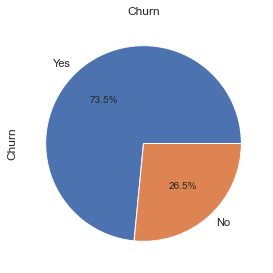

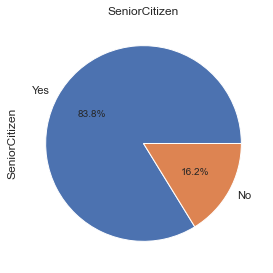

In [12]:

plot_1 = df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%',  
                                            figsize=(4.5,4.5),title='Churn', labels=("Yes","No"), subplots=False)                                            
fig = plt.figure()

                                              
plot_2 = df['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%1.1f%%',  
                                            figsize=(4.5,4.5),
                                                   title='SeniorCitizen', labels=("Yes","No"), subplots=False)                                            



### Churn and Total Charges

The median in sample that left using the product 
703.55
The median in the sample that remain using the product 
1679.525


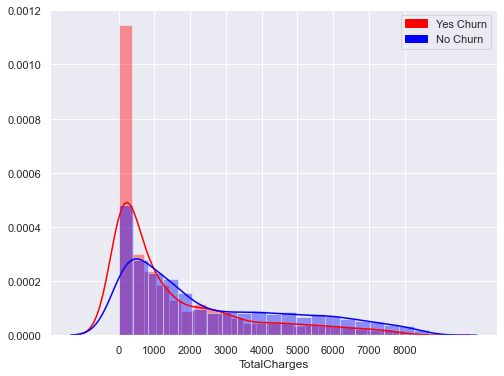

In [13]:
### Selecting Values in Total Charges by Churn

df_hist= df[df.Churn==1]
df_hist_0= df[df.Churn==0]

### Plotting Histogram with two different Total Charges distribuition by Churn

fig = plt.figure(figsize=(8,6))

sns.distplot(df_hist['TotalCharges'],color="red" ,kde= True, label= 1)
sns.distplot(df_hist_0['TotalCharges'], color="blue",kde= True, label= 0)

## Adding Legend

import matplotlib.patches as mpatches
Yes = mpatches.Patch(color='red', label='Yes Churn')
No = mpatches.Patch(color='blue', label='No Churn')
plt.legend(handles=[Yes, No]);
plt.xticks(range(0,8500,1000)) ## Adding values in X coordinate

### Total Charges Median Values by Churn

df_median= df[["Churn", "TotalCharges"]]
df_Y= df_median[df_median.Churn==1] 
df_N= df_median[df_median.Churn==0]

print(f"The median in sample that left using the product \n{df_Y.median()[1]}\nThe median in the sample that remain using the product \n{df_N.median()[1]}" )


## Non parametric test : Mann Whitney test

[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)

In [14]:
x=df["Churn"]
y = df["TotalCharges"]

from scipy.stats import mannwhitneyu
mannwhitneyu_test = stats.mannwhitneyu(x, y)
print(f"The Mann Whitney test p-values inferior than 0.05 ({np.round(mannwhitneyu_test[1])})\n it means the null hypothesis shouldn't be retained: \n The difference between the medians is statistically significant")

The Mann Whitney test p-values inferior than 0.05 (0.0)
 it means the null hypothesis shouldn't be retained: 
 The difference between the medians is statistically significant


### How is the data behaviour between Churn&Tenure and Senior Citizen&Tenure

The median in sample that left using the product 
31.0
The median in the sample that remain using the product 
28.0

The Mann Whitney test p-values inferior than 0.05 (0.0)
 it means the null hypothesis shouldn't be retained: 
The difference between the medians is statistically significant


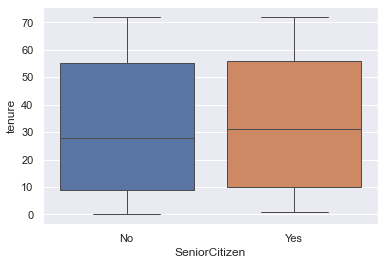

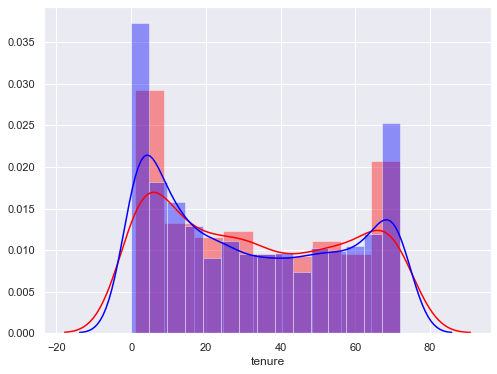

In [15]:
### Plotting Box plot with two different Total Charges distribuition by Churn
box_plot=sns.boxplot(x="SeniorCitizen", y="tenure", data=df,  linewidth=1. );
plt.xticks((0,1), ["No", "Yes"])

### Calculationg mean and median of Tenure by Senior Citizen
df_median= df[["SeniorCitizen", "tenure"]]
df_Y= df_median[df_median.SeniorCitizen==1] 
df_N= df_median[df_median.SeniorCitizen==0]

print(f"The median in sample that left using the product \n{df_Y.median()[1]}\nThe median in the sample that remain using the product \n{df_N.median()[1]}\n" )

####   Mann Whitney test

x=df["SeniorCitizen"]
y=["tenure"]

mannwhitneyu_test = stats.mannwhitneyu(x, y)
print(f"The Mann Whitney test p-values inferior than 0.05 ({np.round(mannwhitneyu_test[1])})\n it means the null hypothesis shouldn't be retained: \nThe difference between the medians is statistically significant")


### Plotting Histogram with two different Total Charges distribuition by Churn

df_hist= df[df.SeniorCitizen==1]
df_hist_0= df[df.SeniorCitizen==0]

fig = plt.figure(figsize=(8,6))

sns.distplot(df_hist['tenure'],color="red" ,kde= True, label= 1)
sns.distplot(df_hist_0['tenure'], color="blue",kde= True, label= 0);

The median in sample that left using the product 
10.0
The median in the sample that remain using the product 
38.0

The Mann Whitney test p-values inferior than 0.05 (0.0)
 it means the null hypothesis shouldn't be retained: 
The difference between the medians is statistically significant


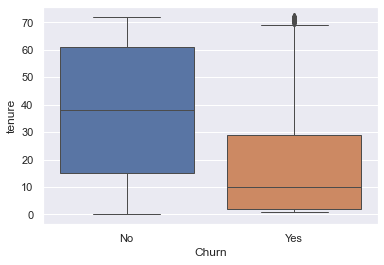

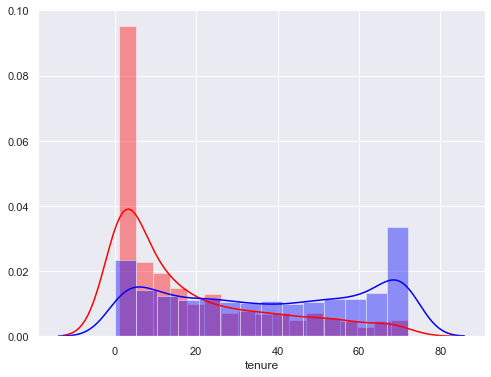

In [16]:
### Plotting Box plot with two different Total Charges distribuition by Churn

box_plot=sns.boxplot(x="Churn", y="tenure", data=df,  linewidth=1. );
plt.xticks((0,1), ["No", "Yes"])

### Calculationg mean and median of Tenure by Senior Citizen
df_median= df[["Churn", "tenure"]]
df_Y= df_median[df_median.Churn==1] 
df_N= df_median[df_median.Churn==0]


####   Mann Whitney test

x=df["Churn"]
y=["tenure"]


mannwhitneyu_test = stats.mannwhitneyu(x, y)

print(f"The median in sample that left using the product \n{df_Y.median()[1]}\nThe median in the sample that remain using the product \n{df_N.median()[1]}\n" )

print(f"The Mann Whitney test p-values inferior than 0.05 ({np.round(mannwhitneyu_test[1])})\n it means the null hypothesis shouldn't be retained: \nThe difference between the medians is statistically significant")


### Plotting Histogram with two different Total Charges distribuition by Churn


df_hist= df[df.Churn==1]
df_hist_0= df[df.Churn==0]


fig = plt.figure(figsize=(8,6))

sns.distplot(df_hist['tenure'],color="red" ,kde= True, label= 1)
sns.distplot(df_hist_0['tenure'], color="blue",kde= True, label= 0);

# Qualitative Variables: General Data Visualization

I select this variables thinking what a customer will have as benefit when It become in a member of online service

In the following section, I develope Bar charts, contingency tables and Chisquare tests(using a p-value: <0.05)

A chi-squared test, also written as χ2 test, is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table. 

[ChiSquare Documentation](https://en.wikipedia.org/wiki/Chi-squared_test)

[Chisquare scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

### Pre step Contingency Tables


We select the values I'm going to use for Contingency tables. 
Also I categorized the values from each value

In [17]:
data_map=df.copy()

data_map["Contract"]= data_map["Contract"].map({0:"Month to Month", 1:"One year",2:"Two years"})
data_map["Partner"]= data_map["Partner"].map({0:"No", 1:"Yes"})
data_map["PhoneService"]= data_map["PhoneService"].map({0:"No", 1:"Yes"})
data_map["Churn"]= data_map["Churn"].map({0:"No", 1:"Yes"})
data_map["SeniorCitizen"]= data_map["SeniorCitizen"].map({0:"No", 1:"Yes"})
data_map["InternetService"]= data_map["InternetService"].map({0:"No", 1:"DSL",2:"Fiber Optic"})

data_map["StreamingTV"]= data_map["StreamingTV"].map({0:"No", 1:"Yes",2:"No internet service"})
data_map["StreamingMovies"]= data_map["StreamingMovies"].map({0:"No", 1:"Yes",2:"No internet service"})
data_map["MultipleLines"]= data_map["MultipleLines"].map({0:"No", 1:"Yes",2:"No phone service"})




## Contingency Tables

### Churn and Senior Citizen

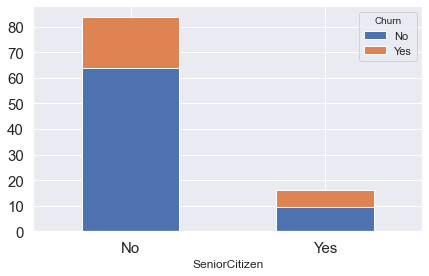

In [18]:
## bar chart - Churn and Kind of contract
cont= pd.crosstab(index=data_map['SeniorCitizen'] ,
            columns=data_map['Churn'], rownames=["SeniorCitizen"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [19]:
# # Relatives Frequencies 

cont= pd.crosstab(index=data_map['SeniorCitizen'],
            columns=data_map['Churn'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["SeniorCitizen"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

SeniorCitizen     No    Yes   Total
Churn                              
No             64.01  19.78   83.79
Yes             9.46   6.76   16.21
Total          73.46  26.54  100.00

In [20]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,2)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.69 that it doesn't mean a statistically significant.


### Churn and Kind of contract

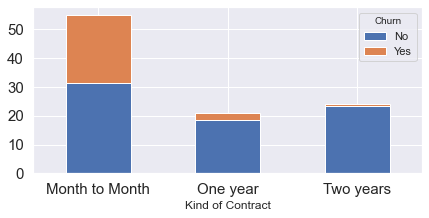

In [21]:
cont= pd.crosstab(index=data_map['Contract'] ,
            columns=data_map['Churn'], rownames=["Kind of Contract"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);



In [22]:
# # Relatives Frequencies 

cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['Contract'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["Kind of contract"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

Kind of contract  Month to Month  One year  Two years   Total
Churn                                                        
No                         31.52     18.56      23.38   73.46
Yes                        23.50      2.36       0.68   26.54
Total                      55.02     20.91      24.07  100.00

In [23]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,2)) + " that it means is statistically significant.") # 
 

The p-value is 0.01 that it means is statistically significant.


### Churn and Internet Service

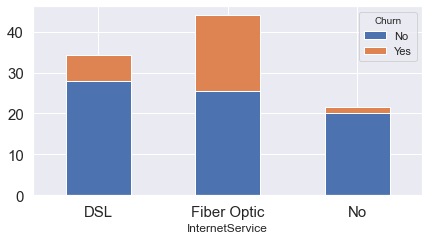

In [24]:

cont= pd.crosstab(index=data_map['InternetService'] ,
            columns=data_map['Churn'], rownames=["InternetService"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [25]:

cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['InternetService'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["InternetService"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

InternetService    DSL  Fiber Optic     No   Total
Churn                                             
No               27.86        25.54  20.06   73.46
Yes               6.52        18.42   1.60   26.54
Total            34.37        43.96  21.67  100.00

In [26]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,5)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.1085 that it doesn't mean a statistically significant.


### Churn and Phone Service

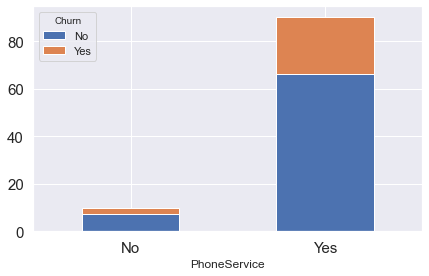

In [27]:
cont= pd.crosstab(index=data_map['PhoneService'] ,
            columns=data_map['Churn'], rownames=["PhoneService"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [28]:
cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['PhoneService'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["PhoneService"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

PhoneService    No    Yes   Total
Churn                            
No            7.27  66.19   73.46
Yes           2.41  24.12   26.54
Total         9.68  90.32  100.00

In [29]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,5)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.99997 that it doesn't mean a statistically significant.


### Churn and Streaming Service

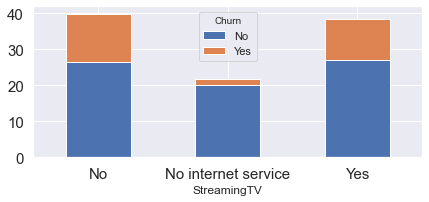

In [30]:

cont= pd.crosstab(index=data_map['StreamingTV'] ,
            columns=data_map['Churn'], rownames=["StreamingTV"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [31]:
cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['StreamingTV'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["StreamingTV"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

StreamingTV     No  No internet service    Yes   Total
Churn                                                 
No           26.52                20.06  26.88   73.46
Yes          13.37                 1.60  11.56   26.54
Total        39.90                21.67  38.44  100.00

In [32]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,5)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.5038 that it doesn't mean a statistically significant.


### Churn and Streaming Movies

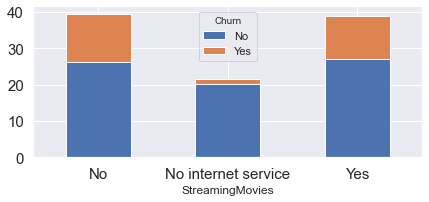

In [33]:

cont= pd.crosstab(index=data_map['StreamingMovies'] ,
            columns=data_map['Churn'], rownames=["StreamingMovies"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [34]:
cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['StreamingMovies'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["StreamingMovies"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

StreamingMovies     No  No internet service    Yes   Total
Churn                                                     
No               26.22                20.06  27.18   73.46
Yes              13.32                 1.60  11.61   26.54
Total            39.54                21.67  38.79  100.00

In [35]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,2)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.5 that it doesn't mean a statistically significant.


### Churn and Multiple lines

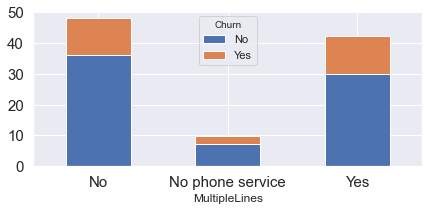

In [36]:

cont= pd.crosstab(index=data_map['MultipleLines'] ,
            columns=data_map['Churn'], rownames=["MultipleLines"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [37]:
cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['MultipleLines'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["MultipleLines"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

MultipleLines     No  No phone service    Yes   Total
Churn                                                
No             36.08              7.27  30.12   73.46
Yes            12.05              2.41  12.07   26.54
Total          48.13              9.68  42.18  100.00

In [38]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,5)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.99992 that it doesn't mean a statistically significant.


### Churn and Partner

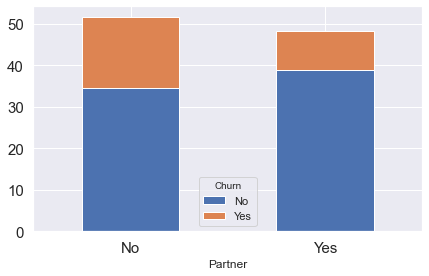

In [39]:

cont= pd.crosstab(index=data_map['Partner'] ,
            columns=data_map['Churn'], rownames=["Partner"]).apply(lambda r: r/len(data_map) *100,
                               axis=0).plot(kind='bar', stacked= True); cont

plt.grid(True)
plt.tight_layout() 
plt.yticks(fontsize=15)

plt.xticks(rotation=360, fontsize=15);

In [40]:
cont= pd.crosstab(index=data_map['Churn'],
            columns=data_map['Partner'],  margins=True, margins_name="Total", rownames=["Churn"], colnames=["Partner"]).apply(lambda r: r/len(data_map) *100,
                               axis=0) 

result= np.round(cont, 2);result## round the values to digits

Partner     No   Yes   Total
Churn                       
No       34.66  38.8   73.46
Yes      17.04   9.5   26.54
Total    51.70  48.3  100.00

In [41]:
chi2, p, dof, expected = stats.chi2_contingency(result)
print("The p-value is " + str(np.round(p,2)) + " that it doesn't mean a statistically significant.") # 
 

The p-value is 0.69 that it doesn't mean a statistically significant.


## To Sum UP the Exploratory Analysis


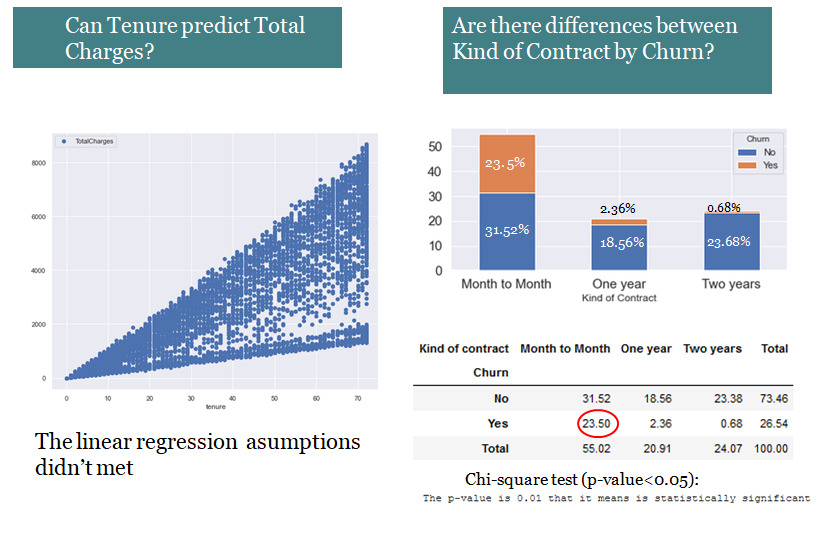

I just found there are differences between Churn and Kind of Contract.
The expected frequencies and the observed frequencies in Churn&Contract contingency table are not the same. 
One can observe that in "Month to month" contract there were more people who left the online service.

# Simulation Studies: Retention Customer

##  Pre Step: Correlation Matrix: How is the correlation between variables?


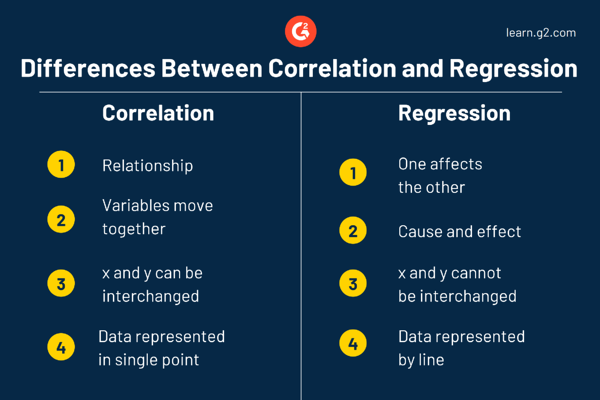
[Image Source](https://learn.g2.com/correlation-vs-regression)

The main purpose of correlation, through the lens of correlation analysis, is to allow experimenters to know the association or the absence of a relationship between two variables. Overall, the objective of correlation analysis is to find the numerical value that shows the relationship between the two variables and how they move together.


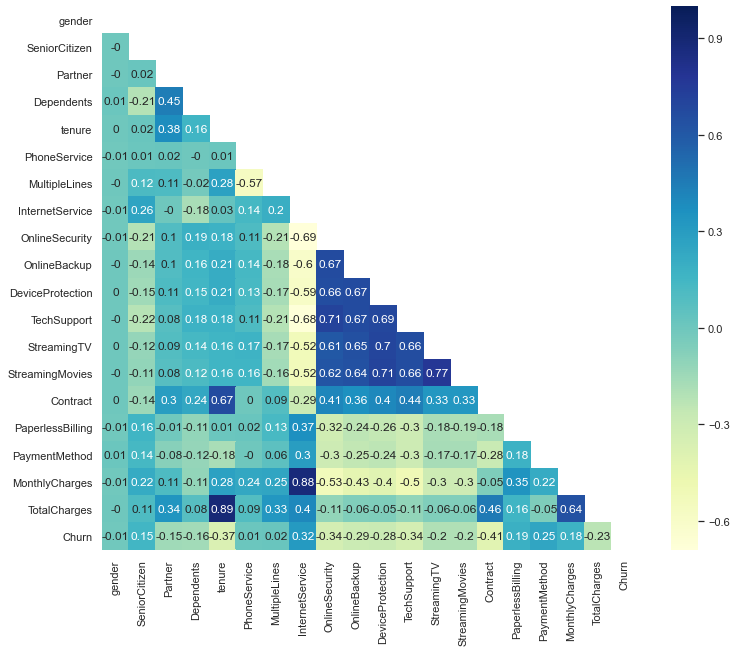

In [42]:
sns.set(style="white")
corr_spearman= df.corr(method='spearman', min_periods=1)

# print(corr_pearson)

mask = np.triu(np.ones_like(np.round(corr_spearman,3), dtype=np.bool))
# mask = np.tril(df.corr())

f, ax = plt.subplots(figsize=(12,10))



sns.heatmap(np.round(corr_spearman,2),square=False,robust=False, annot=True, cbar=True, cmap="YlGnBu", mask=mask);
plt.show()


Why I used Spearman instead of Pearson: 

Spearman Corrleation is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. In a monotonic relationship, the variables tend to change at the same time, but not necessarily at a constant rate.

- Also used when the normality assumption isn't met. 
- On another hand, It doesn't make sense to use Pearson, or search for linear relationships, when it is used nominal and/or ordinal variables in this database. 

Highest Spearman Coefficients:

- Tenure and Total charges are related (0.83), but it's not possible to explain if a unit in tenure changes, how many units per average would change in total charges( The assumptions are not met for developing a simple linear regresion )
- Internet Service and Monthly Charges are related (0.88)


I have to take of the variables on the top of the correlation matrix, these variables are very similar in content terms and they have the same number of categories. (Possible Multcolinearity?)

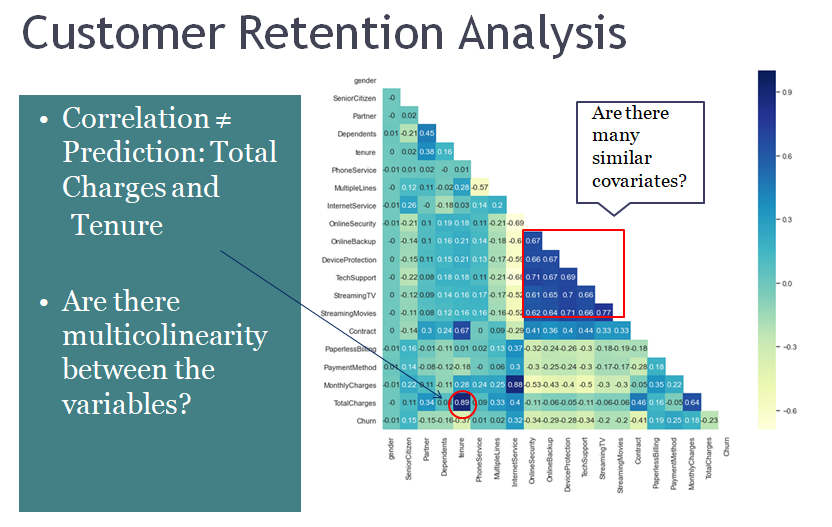

# Retention Customer: Survival Analysis

## Kaplan Meier Fitter

The Kaplan–Meier estimator,also known as the product limit estimator, is a non-parametric statistic used to estimate the survival function from lifetime data. [1](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator)


A plot of the Kaplan–Meier estimator is a series of declining horizontal steps which, with a large enough sample size, approaches the true survival function for that population. The value of the survival function between successive distinct sampled observations ("clicks") is assumed to be constant. 

[Manish Kumar Goel, Pardeep Khanna, and Jugal Kishore, 2010, "Understanding survival analysis: Kaplan-Meier 
estimate"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/)

["A PRACTICAL GUIDE TO UNDERSTANDING KAPLAN-MEIER CURVES"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3932959/)

[lifelines Package Documentation](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html)

[Programm Creek](https://www.programcreek.com/python/example/124812/lifelines.KaplanMeierFitter)

In [43]:
def plot_km_survf(data, t_col="t", e_col="e"):
    from lifelines import KaplanMeierFitter
    from lifelines.plotting import add_at_risk_counts
    fig, ax = plt.subplots(figsize=(8, 6))
    kmf = KaplanMeierFitter()
    kmf.fit(data[t_col], event_observed=data[e_col], label="KM Survival Curve", alpha=0.01)
    kmf.plot(figsize=(10,8), ci_alpha= 0.01,show_censors=False, ci_legend=True, ci_force_lines=True, ax=ax); # the former graph is an internal lifelines plotting graph, which includes confidence intervals and a step-wise visualization
    plt.ylim(0, 1.01)
    plt.xlabel("Time")
    plt.ylabel("Probalities")
    plt.legend(loc="best")
    add_at_risk_counts(kmf, ax=ax)
    plt.show() 

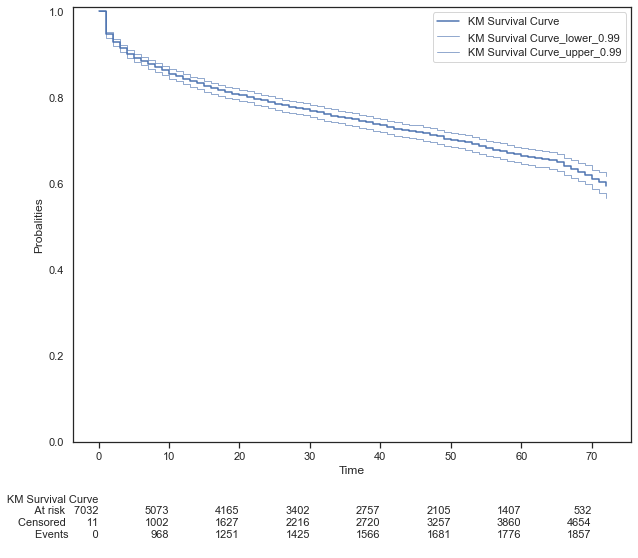

In [44]:
# kmf.predict(5)
plot_km_survf(df, t_col="tenure", e_col="Churn")

A homogeneous slope indicates that the subjects are steadily disappearing


- Events: Subjects that left the service

- Censored:Participant is said to be censored when information on time to event is not available due to loss to follow-up or non-occurrence of outcome event before the trial end.

- At risk: Number of cases that have the possibility of experiencing the event(Churn) in each time interval. 


## Cox proportion hazard model  

Cox proportion hazard model enables us to test the effect of other independent variables on survival times of different groups of patients, just like the multiple regression model.

Life lines package provided to different modules for estimating Cox proportion hazard model.

- The first one estimate Kaplan Meier and Cox proportion hazard coefficients (log rank). And it provives the scaled Schoenfeld residual  plots

- The Second one just estimate the Cox proportion hazard coefficients (log rank).


### One alternative: Cox Regression Fitter 



[Cox Regression Fitter Package](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxTimeVaryingFitter.html)


The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                       test_statistic      p  -log2(p)
Contract         km            202.51 <0.005    150.24
                 rank          181.50 <0.005    135.01
Dependents       km              0.17   0.68      0.55
                 rank            0.16   0.69      0.54
DeviceProtection km              5.75   0.02      5.92
                 rank            5.37   0.02      5.61
InternetService  km             14.43 <0.005     12.75
                 rank           16.24 <0.005     14.13
MonthlyCharges   km            192.07 <0.005    142.67
                 rank          248.28 <0.005    183.41
MultipleLines    km              4.25   0.04      4.67
                 rank            1.91   0.17      2.59
OnlineBackup     km              2.73   0.10      3.35
                 rank            3.08   0.08      3.66
OnlineSecurity   km              2.20   0.14      2.85
                 rank            1.41   0.24      2.09
PaperlessBilling km              0.59   0.44      1.18
                 rank            1.11   0.29      1.77
Partner          km              3.02   0.08      3.60
                 rank            5.53   0.02      5.74
PaymentMethod    km              3.05   0.08      3.63
                 rank            2.31   0.13      2.96
PhoneService     km             13.09 <0.005     11.72
                 rank            9.89 <0.005      9.23
SeniorCitizen    km              3.33   0.07      3.88
                 rank            1.79   0.18      2.47
StreamingMovies  km             13.89 <0.005     12.34
                 rank           16.17 <0.005     14.07
StreamingTV      km              7.85   0.01      7.62
                 rank           10.87 <0.005     10.00
TechSupport      km              1.48   0.22      2.16
                 rank            0.93   0.34      1.58
TotalCharges     km            167.88 <0.005    125.13
                 rank           25.27 <0.005     20.94
gender           km              0.04   0.85      0.24
                 rank            0.12   0.73      0.45



1. Variable 'PhoneService' failed the non-proportional test: p-value is 0.0003.

   Advice: with so few unique values (only 2), you can include `strata=['PhoneService', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'InternetService' failed the non-proportional test: p-value is 0.0001.

   Advice: with so few unique values (only 3), you can include `strata=['InternetService', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'StreamingTV' failed the non-proportional test: p-value is 0.0010.

   Advice: with so few unique values (only 3), you can include `strata=['StreamingTV', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'StreamingMovies' failed the non-proportional test: p-value is 0.0001.

   Advice: with so few unique values (on

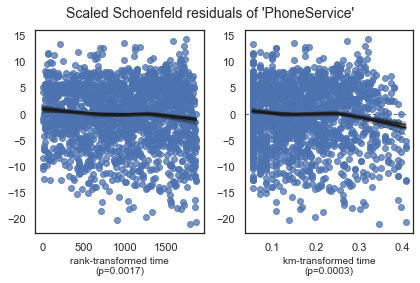

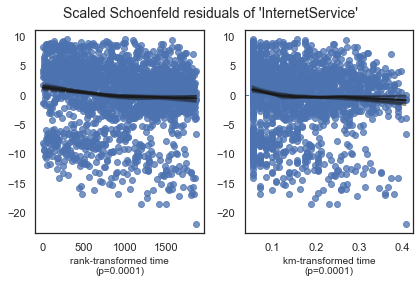

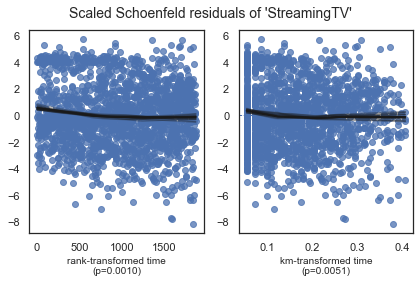

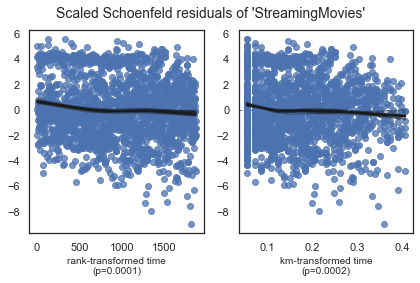

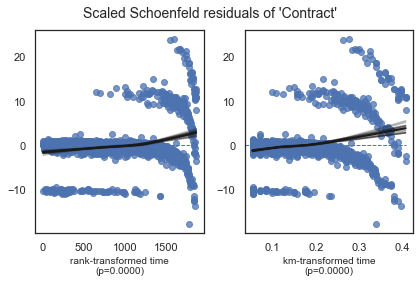

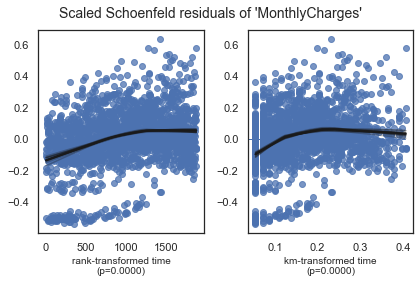

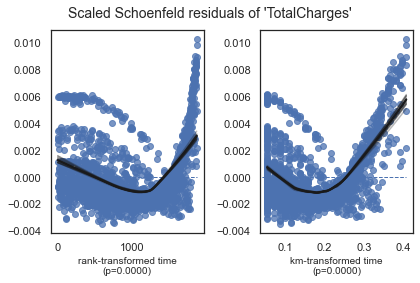

In [45]:
from lifelines import CoxPHFitter
cph = CoxPHFitter().fit(df, 'tenure', 'Churn')
# cph.print_summary()
axes = cph.check_assumptions(df,  p_value_threshold=0.01, advice=True, show_plots=True)

# the scaled Schoenfeld residual  plots
# The partial residual of a case, also called the Schoenfeld residual (1982; see also Grambsch and Therneau, 1994), is the difference between its observed value on a covariate
# and its corresponding expected value


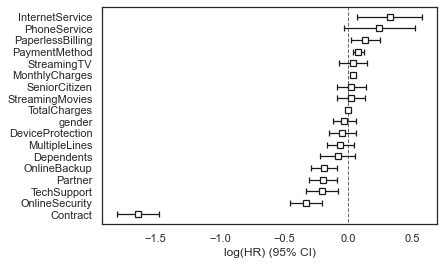

In [46]:
cph.plot(); ## confidence intervals chart

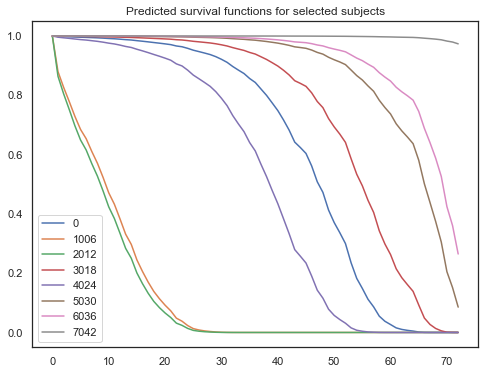

In [47]:
ax = cph.predict_survival_function(df.loc[::1006]).plot.line(figsize=(8, 6))
ax.set_title("Predicted survival functions for selected subjects");

In [48]:
cph.print_summary(3) # access the individual results with breslow baseline estimation

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12698.624
         time fit was run = 2021-04-21 07:41:15 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
gender           -0.029      0.971      0.046           -0.120            0.062                0.886                1.064
SeniorCitizen     0.027      1.027      0.056           -0.084            0.137                0.919                1.147
Partner          -0.195      0.823      0.055           -0.303           -0.088                0.739                0.916
Dependents       -0.080      0.923      0.070           -0.217            0.056                0.805                1.058
PhoneService      0.246      1.278      0.141           -0.030            0.522                0.970                1.685
MultipleLines    -0.058      0.943      0.053           -0.162            0.045                0.850                1.047
InternetService   0.324      1.383      0.128            0.074            0.575                1.077                1.777
OnlineSecurity   -0.330      0.719      0.063           -0.455           -0.206                0.635                0.814
OnlineBackup     -0.187      0.829      0.051           -0.288           -0.087                0.750                0.917
DeviceProtection -0.043      0.958      0.052           -0.145            0.059                0.865                1.061
TechSupport      -0.204      0.816      0.063           -0.328           -0.080                0.720                0.924
StreamingTV       0.038      1.039      0.056           -0.071            0.147                0.932                1.159
StreamingMovies   0.024      1.024      0.055           -0.085            0.132                0.919                1.142
Contract         -1.637      0.195      0.083           -1.800           -1.474                0.165                0.229
PaperlessBilling  0.137      1.147      0.057            0.026            0.248                1.026                1.281
PaymentMethod     0.080      1.084      0.022            0.037            0.123                1.038                1.131
MonthlyCharges    0.038      1.039      0.004            0.031            0.045                1.032                1.047
TotalCharges     -0.002      0.998      0.000           -0.002           -0.002                0.998                0.998

                       z       p   -log2(p)
covariate                                  
gender            -0.634   0.526      0.927
SeniorCitizen      0.473   0.636      0.652
Partner           -3.559 <0.0005     11.390
Dependents        -1.154   0.248      2.009
PhoneService       1.744   0.081      3.623
MultipleLines     -1.103   0.270      1.888
InternetService    2.538   0.011      6.487
OnlineSecurity    -5.207 <0.0005     22.314
OnlineBackup      -3.643 <0.0005     11.858
DeviceProtection  -0.824   0.410      1.286
TechSupport       -3.215   0.001      9.584
StreamingTV        0.692   0.489      1.032
StreamingMovies    0.430   0.668      0.583
Contract         -19.687 <0.0005    284.220
PaperlessBilling   2.417   0.016      5.999
PaymentMethod      3.662 <0.0005     11.962
MonthlyCharges    10.604 <0.0005     84.857
TotalCharges     -38.967 <0.0005        inf
---
Concordance = 0.927
Partial AIC = 25433.248
log-likelihood ratio test = 5908.832 on 18 df
-log2(p) of ll-ratio test = inf

Breslow: weight wi = r

 it weights each event by the number of subjects exposed at the time the event occurs; therefore, events at the beginning are weighted more heavily than those at the end, since the number of subjects exposed  decreases as time goes by.

Watch out: It doesn’t work well, when there are many censored events 


### Second alternative: Log-rank statistic 


The log-rank test is used to test whether the difference between survival times between two groups is statistically different or not, but do not allow to test the effect of the other independent variables. 

[proportional_hazard_test Lifelines's Module](https://lifelines.readthedocs.io/en/latest/lifelines.statistics.html?highlight=proportional_hazard_test#lifelines.statistics.proportional_hazard_test)

In [49]:
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, df, time_transform='rank')
# print(results)

# results = proportional_hazard_test(cph, rossi, time_transform='rank')
print("Model: Untransformed Variables")
results.print_summary(decimals=3)

Model: Untransformed Variables


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                  test_statistic      p  -log2(p)
Contract                  181.50 <0.005    135.01
Dependents                  0.16   0.69      0.54
DeviceProtection            5.37   0.02      5.61
InternetService            16.24 <0.005     14.13
MonthlyCharges            248.28 <0.005    183.41
MultipleLines               1.91   0.17      2.59
OnlineBackup                3.08   0.08      3.66
OnlineSecurity              1.41   0.24      2.09
PaperlessBilling            1.11   0.29      1.77
Partner                     5.53   0.02      5.74
PaymentMethod               2.31   0.13      2.96
PhoneService                9.89 <0.005      9.23
SeniorCitizen               1.79   0.18      2.47
StreamingMovies            16.17 <0.005     14.07
StreamingTV                10.87 <0.005     10.00
TechSupport                 0.93   0.34      1.58
TotalCharges               25.27 <0.005     20.94
gender                      0.12   0.73      0.45

# Conclusions

## What are the best variables which explain the customer retention?

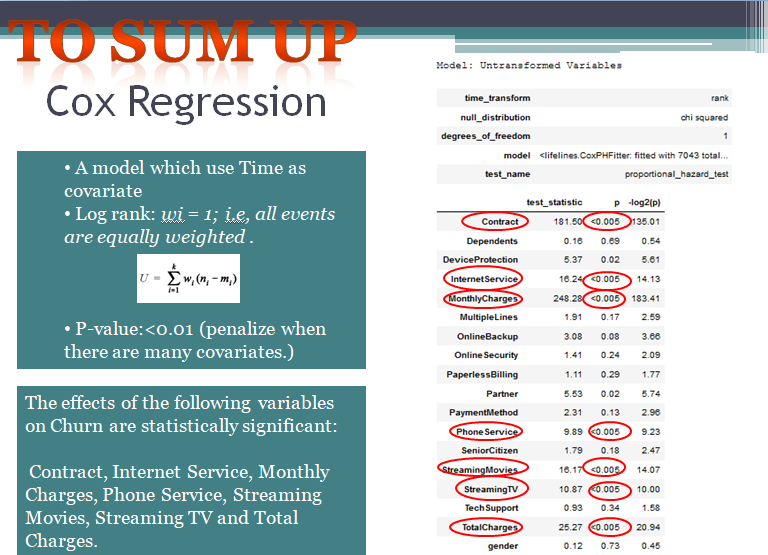

The following variables that are statistically significant (p-value < 0.01): Contract, Internet Service, Monthly Charges, Phone Service, Streaming Movies, Streaming TV and Total Charges. 

In these variables, the hyphotesis null cannot be retained:
The effects of these variables on the Churn variable are statistically significant.


The Kaplan-Meier procedure includes three statistics for comparisons between groups. All three are based on the difference between the number of observed (ni ) and expected (mi ) events at each time point:
- Log-rank
- Breslow
- Tarone and Ware 

I took the decision to use log-rank instead of Breslow estimation, there were a lot of censored cases. 





## Further Analysis

- Deeper exploration of the lifelines package in order to find a customized survival analysis
- Develope a code that generate the Kaplan Meier curves by variables.
- Stratified variables and incluid it again a Cox Hazard regression
- Reduce the number of variables in order to copy with the mulcolinearity



Following the "life lines" recomendation 

Result from Cell nº 45:

"7. Variable 'TotalCharges' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'TotalCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'TotalCharges' using pd.cut, and then specify it in
`strata=['TotalCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below."

I tried to use it but it's giving me problems to deplot the graphics, it shouldn not happen.

In [50]:
# df=df.iloc[11:,:]

In [51]:
# strata_TC = df.copy()
# strata_TC['TC_strata'] = pd.cut(strata_TC['TotalCharges'],np.arange(0,90, 4))
# strata_TC[['TotalCharges', 'TC_strata']].head()
# strata_TC=strata_TC.drop("TotalCharges", axis=1)
# # strata_TC

In [52]:
# axes = cph.fit(strata_TC, "tenure","Churn" ,strata=['TC_strata'])
# axes.print_summary()
# # axes = cph.check_assumptions(strata_TC,  p_value_threshold=0.01, advice=True, show_plots=True)


In [53]:
# # axes = cph.fit(strata_TC, "tenure","Churn" ,strata=['TC_strata'])
# results = proportional_hazard_test(axes, strata_TC, time_transform='rank')
# # print(results)

# # results = proportional_hazard_test(cph, rossi, time_transform='rank')
# print("Model: Untransformed Variables")
# results.print_summary(decimals=3)